<a href="https://colab.research.google.com/github/Pranayshukla0610/ML-projects-portfolio/blob/main/Sales_Uplift_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from scipy import stats

In [ ]:
df = pd.read_csv('/content/Advertising Budget and Sales ($).csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


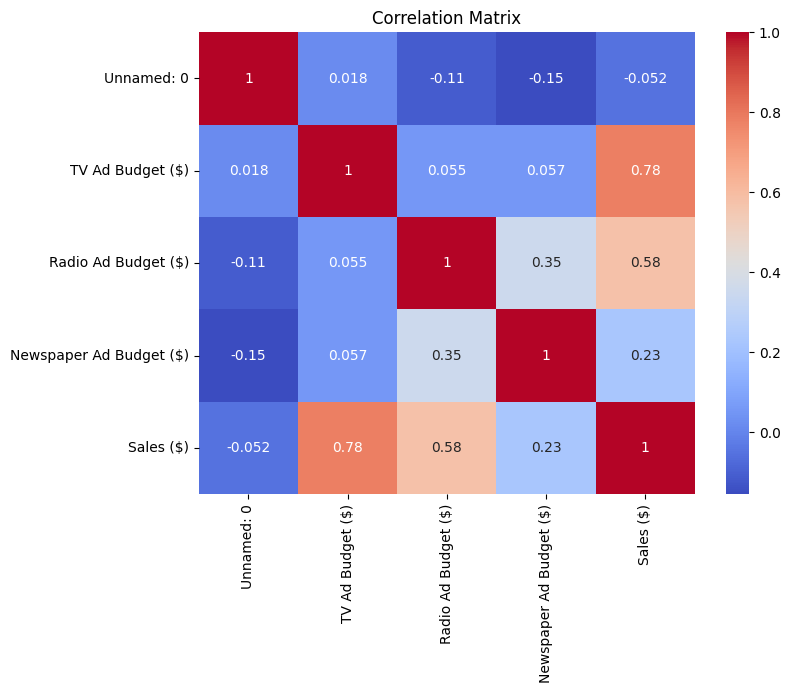

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

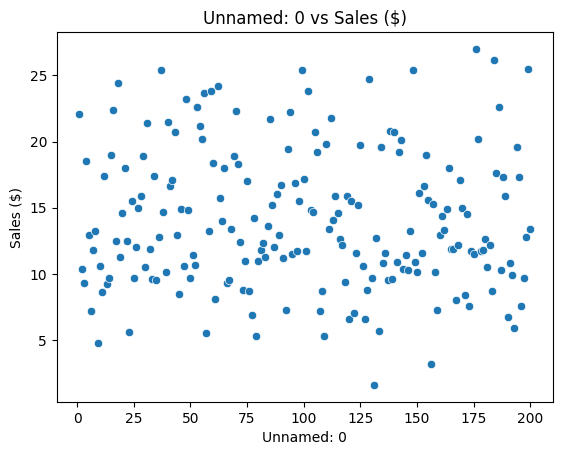

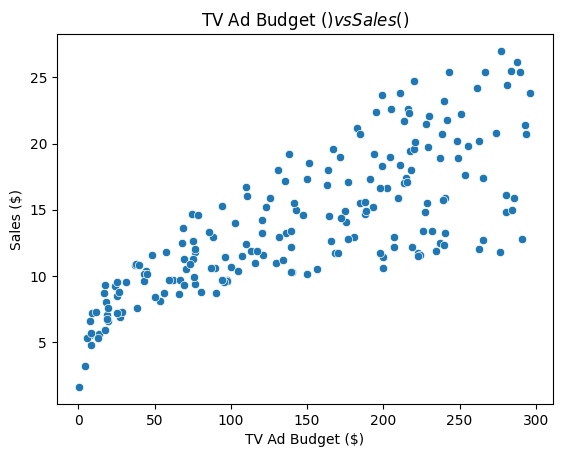

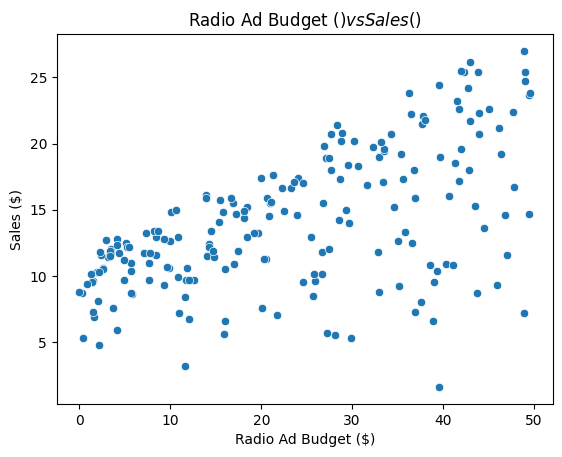

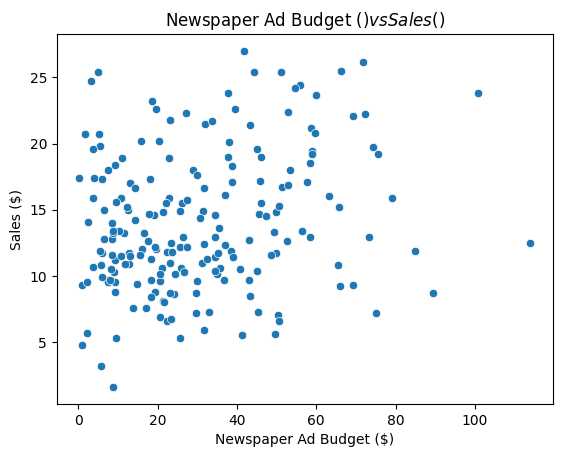

In [ ]:
for col in df.columns:
  if col != 'Sales ($)':
    plt.figure()
    sns.scatterplot(x=col, y='Sales ($)', data=df)
    plt.title(f'{col} vs Sales ($)')
    plt.xlabel(col)
    plt.ylabel('Sales ($)')
    plt.show()

In [ ]:
X = df.drop('Sales ($)',axis=1)
y = df['Sales ($)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score:',r2)
print('MSE:',mse)
print('RMSE:',rmse)

R2 Score: 0.898648915141708
MSE: 3.1990044685889067
RMSE: 1.7885761008659673


In [ ]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
})

coefficients

,Feature,Coefficient
0,Unnamed: 0,0.000644
1,TV Ad Budget ($),0.044718
2,Radio Ad Budget ($),0.189251
3,Newspaper Ad Budget ($),0.003046
